To download the datasets use this link - https://www.kaggle.com/datasets/wcukierski/enron-email-dataset?resource=download

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import email
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [7]:
# Read the CSV file into a DataFrame
df=pd.read_csv('emails.csv')

# Display a sample of 5 rows from the DataFrame
df.sample(5)

,file,message
55901,dasovich-j/all_documents/10460.,Message-ID: <23522851.1075843406954.JavaMail.e...
120466,gay-r/all_documents/300.,Message-ID: <15467093.1075855735941.JavaMail.e...
214750,kaminski-v/discussion_threads/2200.,Message-ID: <17337622.1075856379152.JavaMail.e...
347223,nemec-g/all_documents/576.,Message-ID: <12503517.1075842591156.JavaMail.e...
310930,mann-k/discussion_threads/1139.,Message-ID: <4015632.1075845779889.JavaMail.ev...


In [8]:
# Get the shape of the DataFrame (number of rows, number of columns)
df.shape

(517401, 2)

In [9]:
# Print the message content of a specific row (row index 1)
print(df.loc[1]['message'])

Message-ID: <15464986.1075855378456.JavaMail.evans@thyme>
Date: Fri, 4 May 2001 13:51:00 -0700 (PDT)
From: phillip.allen@enron.com
To: john.lavorato@enron.com
Subject: Re:
Mime-Version: 1.0
Content-Type: text/plain; charset=us-ascii
Content-Transfer-Encoding: 7bit
X-From: Phillip K Allen
X-To: John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>
X-cc: 
X-bcc: 
X-Folder: \Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail
X-Origin: Allen-P
X-FileName: pallen (Non-Privileged).pst

Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.

As far as the business meetings, I think it would be more productive to try and stimulate discussions across the different groups about what is working and what is not.  Too often the

In [10]:
# Parse email message using email.message_from_string

# Retrieve the email message from the DataFrame
message = df.loc[1]['message']

# Parse the email message using email.message_from_string
e = email.message_from_string(message)

# Extract the items from the email message
items = e.items()

# Convert the items into a dictionary for easier access
items_dict = dict(items)

# Get the content of the email
content = e.get_payload()

# Add the content to the dictionary
items_dict['Content'] = content

items_dict

{'Message-ID': '<15464986.1075855378456.JavaMail.evans@thyme>',
 'Date': 'Fri, 4 May 2001 13:51:00 -0700 (PDT)',
 'From': 'phillip.allen@enron.com',
 'To': 'john.lavorato@enron.com',
 'Subject': 'Re:',
 'Mime-Version': '1.0',
 'Content-Type': 'text/plain; charset=us-ascii',
 'Content-Transfer-Encoding': '7bit',
 'X-From': 'Phillip K Allen',
 'X-To': 'John J Lavorato <John J Lavorato/ENRON@enronXgate@ENRON>',
 'X-cc': '',
 'X-bcc': '',
 'X-Folder': "\\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail",
 'X-Origin': 'Allen-P',
 'X-FileName': 'pallen (Non-Privileged).pst',
 'Content': "Traveling to have a business meeting takes the fun out of the trip.  Especially if you have to prepare a presentation.  I would suggest holding the business plan meetings here then take a trip without any formal business meetings.  I would even try and get some honest opinions on whether a trip is even desired or necessary.\n\nAs far as the business meetings, I think it would be more productive to try 

In [11]:
def extract_email_fields(df, message_column):
    # Create empty lists to store the extracted email fields
    message_ids = []
    dates = []
    senders = []
    receivers = []
    subjects = []
    X_folders = []
    contents = []

    # Iterate over the values in the specified column
    for message in df[message_column].values:
        # Parse the email message using email.message_from_string
        e = email.message_from_string(message)

        # Extract the desired fields from the email
        message_id = e['Message-ID']
        date = e['Date']
        sender = e['From']
        receiver = e['To']
        subject = e['Subject']
        X_folder = e['X-Folder']
        content = e.get_payload()

        # Append the extracted fields to the respective lists
        message_ids.append(message_id)
        dates.append(date)
        senders.append(sender)
        receivers.append(receiver)
        subjects.append(subject)
        X_folders.append(X_folder)
        contents.append(content)

    # Add the extracted fields as new columns to the DataFrame
    df['Message-ID'] = message_ids
    df['Date'] = dates
    df['Sender'] = senders
    df['Receiver'] = receivers
    df['Subject'] = subjects
    df['X-Folder'] = X_folders
    df['Content'] = contents

    return df

In [12]:
df=extract_email_fields(df,'message')

In [13]:
df

,file,message,Message-ID,Date,Sender,Receiver,Subject,X-Folder,Content
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Here is our forecast\n\n
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,"\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Se...",Traveling to have a business meeting takes the...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,test successful. way to go!!!
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,"Randy,\n\n Can you send me a schedule of the s..."
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,\Phillip_Allen_Dec2000\Notes Folders\'sent mail,Let's shoot for Tuesday at 11:45.
...,...,...,...,...,...,...,...,...,...
517396,zufferli-j/sent_items/95.,Message-ID: <26807948.1075842029936.JavaMail.e...,<26807948.1075842029936.JavaMail.evans@thyme>,"Wed, 28 Nov 2001 13:30:11 -0800 (PST)",john.zufferli@enron.com,kori.loibl@enron.com,Trade with John Lavorato,"\ExMerge - Zufferli, John\Sent Items",This is a trade with OIL-SPEC-HEDGE-NG (John L...
517397,zufferli-j/sent_items/96.,Message-ID: <25835861.1075842029959.JavaMail.e...,<25835861.1075842029959.JavaMail.evans@thyme>,"Wed, 28 Nov 2001 12:47:48 -0800 (PST)",john.zufferli@enron.com,john.lavorato@enron.com,Gas Hedges,"\ExMerge - Zufferli, John\Sent Items",Some of my position is with the Alberta Term b...
517398,zufferli-j/sent_items/97.,Message-ID: <28979867.1075842029988.JavaMail.e...,<28979867.1075842029988.JavaMail.evans@thyme>,"Wed, 28 Nov 2001 07:20:00 -0800 (PST)",john.zufferli@enron.com,dawn.doucet@enron.com,RE: CONFIDENTIAL,"\ExMerge - Zufferli, John\Sent Items",2\n\n -----Original Message-----\nFrom: \tDouc...
517399,zufferli-j/sent_items/98.,Message-ID: <22052556.1075842030013.JavaMail.e...,<22052556.1075842030013.JavaMail.evans@thyme>,"Tue, 27 Nov 2001 11:52:45 -0800 (PST)",john.zufferli@enron.com,jeanie.slone@enron.com,Calgary Analyst/Associate,"\ExMerge - Zufferli, John\Sent Items",Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...


In [14]:
df['file']

0             allen-p/_sent_mail/1.
1            allen-p/_sent_mail/10.
2           allen-p/_sent_mail/100.
3          allen-p/_sent_mail/1000.
4          allen-p/_sent_mail/1001.
                    ...            
517396    zufferli-j/sent_items/95.
517397    zufferli-j/sent_items/96.
517398    zufferli-j/sent_items/97.
517399    zufferli-j/sent_items/98.
517400    zufferli-j/sent_items/99.
Name: file, Length: 517401, dtype: object

In [15]:
# Extract the name from the "file" column
df['Name']=df['file'].apply(lambda x: x.split('/')[0].split('-')[0].capitalize())

# Display the DataFrame with the extracted names
df['Name'].unique()

array(['Allen', 'Arnold', 'Arora', 'Badeer', 'Bailey', 'Bass', 'Baughman',
       'Beck', 'Benson', 'Blair', 'Brawner', 'Buy', 'Campbell', 'Carson',
       'Cash', 'Causholli', 'Corman', 'Crandell', 'Cuilla', 'Dasovich',
       'Davis', 'Dean', 'Delainey', 'Derrick', 'Dickson', 'Donoho',
       'Donohoe', 'Dorland', 'Ermis', 'Farmer', 'Fischer', 'Forney',
       'Fossum', 'Gang', 'Gay', 'Geaccone', 'Germany', 'Gilbertsmith',
       'Giron', 'Griffith', 'Grigsby', 'Guzman', 'Haedicke', 'Hain',
       'Harris', 'Hayslett', 'Heard', 'Hendrickson', 'Hernandez', 'Hodge',
       'Holst', 'Horton', 'Hyatt', 'Hyvl', 'Jones', 'Kaminski', 'Kean',
       'Keavey', 'Keiser', 'King', 'Kitchen', 'Kuykendall', 'Lavorato',
       'Lay', 'Lenhart', 'Lewis', 'Linder', 'Lokay', 'Lokey', 'Love',
       'Lucci', 'Maggi', 'Mann', 'Martin', 'May', 'Mccarty', 'Mcconnell',
       'Mckay', 'Mclaughlin', 'Merriss', 'Meyers', 'Mims', 'Motley',
       'Neal', 'Nemec', 'Panus', 'Parks', 'Pereira', 'Perlingiere',
  

In [16]:
df['X-Folder'].unique()

array(["\\Phillip_Allen_Jan2002_1\\Allen, Phillip K.\\'Sent Mail",
       "\\Phillip_Allen_Dec2000\\Notes Folders\\'sent mail",
       "\\Phillip_Allen_June2001\\Notes Folders\\'sent mail", ...,
       '\\ExMerge - Zufferli, John\\Inbox',
       '\\ExMerge - Zufferli, John\\Inbox\\Quotes',
       '\\ExMerge - Zufferli, John\\Sent Items'], dtype=object)

In [17]:
print("number of folders:",df['X-Folder'].shape[0])
print("number of folders:",df['X-Folder'].unique().shape[0])

number of folders: 517401
number of folders: 5336


In [18]:
unique_email = pd.DataFrame(df['X-Folder'].value_counts())
unique_email = unique_email.reset_index()

#Give a column name
unique_email.columns = ['folder_name', 'count']

unique_email.iloc[:20,:]

,folder_name,count
0,\Kay_Mann_June2001_1\Notes Folders\All documents,6639
1,\Tanya_Jones_Dec2000\Notes Folders\All documents,5934
2,\Jeff_Dasovich_June2001\Notes Folders\All docu...,5637
3,\Sara_Shackleton_Dec2000_June2001_1\Notes Fold...,5211
4,\Vincent_Kaminski_Jun2001_1\Notes Folders\All ...,5066
5,\Kay_Mann_June2001_2\Notes Folders\Discussion ...,4956
6,\Jeff_Dasovich_Dec2000\Notes Folders\All docum...,4660
7,\Kay_Mann_June2001_3\Notes Folders\Sent,4440
8,\Kay_Mann_June2001_4\Notes Folders\'sent mail,4220
9,\Mark_Taylor _Dec_2000\Notes Folders\All docum...,4022


In [19]:
df.sample(10)

,file,message,Message-ID,Date,Sender,Receiver,Subject,X-Folder,Content,Name
322181,mann-k/sent/751.,Message-ID: <15190202.1075845936511.JavaMail.e...,<15190202.1075845936511.JavaMail.evans@thyme>,"Sun, 17 Sep 2000 14:00:00 -0700 (PDT)",kay.mann@enron.com,reagan.rorschach@enron.com,Re: VEPCO interconnection agreement,\Kay_Mann_June2001_3\Notes Folders\Sent,"Hi Reagan,\n\nIs a conference room available o...",Mann
330858,mckay-b/deleted_items/118.,Message-ID: <25059308.1075851565333.JavaMail.e...,<25059308.1075851565333.JavaMail.evans@thyme>,"Mon, 22 Oct 2001 17:27:58 -0700 (PDT)",nancy.sitz@gte.net,"travlisawill@peoplepc.com, tmcgrady@nts-online...",URGENT NOTICE!!!!!!,\BMCKAY (Non-Privileged)\Deleted Items,"\n DO NOT OPEN THE MESSAGE ""MICROSOFT W...",Mckay
360895,perlingiere-d/sent_items/454.,Message-ID: <29731032.1075858536198.JavaMail.e...,<29731032.1075858536198.JavaMail.evans@thyme>,"Thu, 19 Jul 2001 10:01:10 -0700 (PDT)",debra.perlingiere@enron.com,pgraff@reliant.com,RE: Master Agreement,"\Perlingiere, Debra (Non-Privileged)\Perlingie...",\n I am free next Tuesday?\n\n -----Original ...,Perlingiere
209981,kaminski-v/c/mangmt/group/management/132.,Message-ID: <10419629.1075856575647.JavaMail.e...,<10419629.1075856575647.JavaMail.evans@thyme>,"Tue, 6 Feb 2001 07:20:00 -0800 (PST)",molly.magee@enron.com,skohli2@enron.com,Anshuman Shrivastava,\Vincent_Kaminski_Jun2001_5\Notes Folders\C:\M...,Sandeep: Vince has asked me to coordinate wit...,Kaminski
330699,mcconnell-m/weather/3.,Message-ID: <16554140.1075843998277.JavaMail.e...,<16554140.1075843998277.JavaMail.evans@thyme>,"Tue, 20 Feb 2001 10:31:00 -0800 (PST)",betty.coneway@enron.com,mike.mcconnell@enron.com,Weather Desk Org Charts,\Mark_McConnell_June2001\Notes Folders\Weather,Mike -- Here are the latest org charts for the...,Mcconnell
85417,davis-d/notes_inbox/45.,Message-ID: <29612567.1075853946417.JavaMail.e...,<29612567.1075853946417.JavaMail.evans@thyme>,"Thu, 7 Dec 2000 02:45:00 -0800 (PST)",wmontg6626@aol.com,"awilliams@matrixservice.com, clott@matrixservi...",Fwd: bring out the kleenex,\Dana_Davis_Dec2000\Notes Folders\Notes inbox,Return-path: <LawyerT@aol.com>\nFrom: LawyerT@...,Davis
72955,dasovich-j/notes_inbox/1844.,Message-ID: <23698602.1075843154955.JavaMail.e...,<23698602.1075843154955.JavaMail.evans@thyme>,"Tue, 21 Nov 2000 05:29:00 -0800 (PST)",susan.mara@enron.com,kaplan@iepa.com,Re: Seeing the Light and Power Up language,\Jeff_Dasovich_Dec2000\Notes Folders\Notes inbox,I am OK with the language because of the use o...,Dasovich
168460,hernandez-j/inbox/358.,Message-ID: <5927385.1075852431625.JavaMail.ev...,<5927385.1075852431625.JavaMail.evans@thyme>,"Fri, 31 Aug 2001 11:07:19 -0700 (PDT)",iris.mack@enron.com,"jae.black@enron.com, \n\t'/o=enron/ou=na/cn=re...",RE: Matrix of Long-Term (Exotic) Options Trading,"\JHERNAN3 (Non-Privileged)\Hernandez, Juan\Inbox","Hi,\n \n I have already met with some o...",Hernandez
158355,hain-m/all_documents/846.,Message-ID: <24757598.1075860369166.JavaMail.e...,<24757598.1075860369166.JavaMail.evans@thyme>,"Thu, 15 Mar 2001 00:33:00 -0800 (PST)",christi.nicolay@enron.com,james.steffes@enron.com,Re: Weekly Electric FERC Report,\Mary_Hain_Aug2000_Jul2001\Notes Folders\All d...,"Currently, (for the East) Thane takes the summ...",Hain
383551,ruscitti-k/emailaddresses/23.,Message-ID: <24165162.1075852838035.JavaMail.e...,<24165162.1075852838035.JavaMail.evans@thyme>,"Mon, 13 Aug 2001 13:59:09 -0700 (PDT)",jstamas@carolina.rr.com,kevin.ruscitti@enron.com,Re:,\KRUSCIT (Non-Privileged)\emailaddresses,just updating email files. hope your well. sa...,Ruscitti


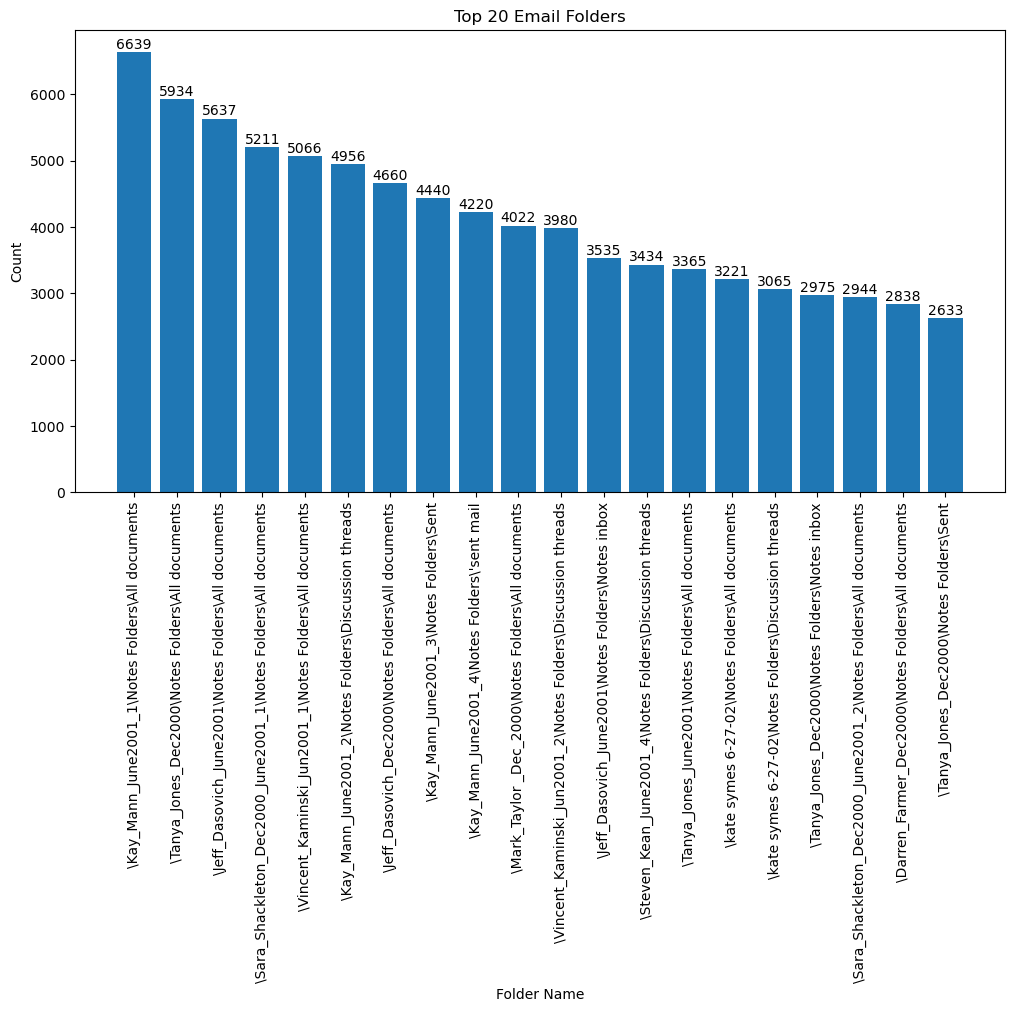

In [20]:
# Get the top 20 folders
top_20_folders = unique_email.iloc[:20]

# Plot the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_20_folders['folder_name'], top_20_folders['count'])

# Add count labels on top of each bar
for i, count in enumerate(top_20_folders['count']):
    plt.text(i, count+50, str(count), ha='center')

plt.xlabel('Folder Name')
plt.ylabel('Count')
plt.title('Top 20 Email Folders')
plt.xticks(rotation=90)
plt.show()

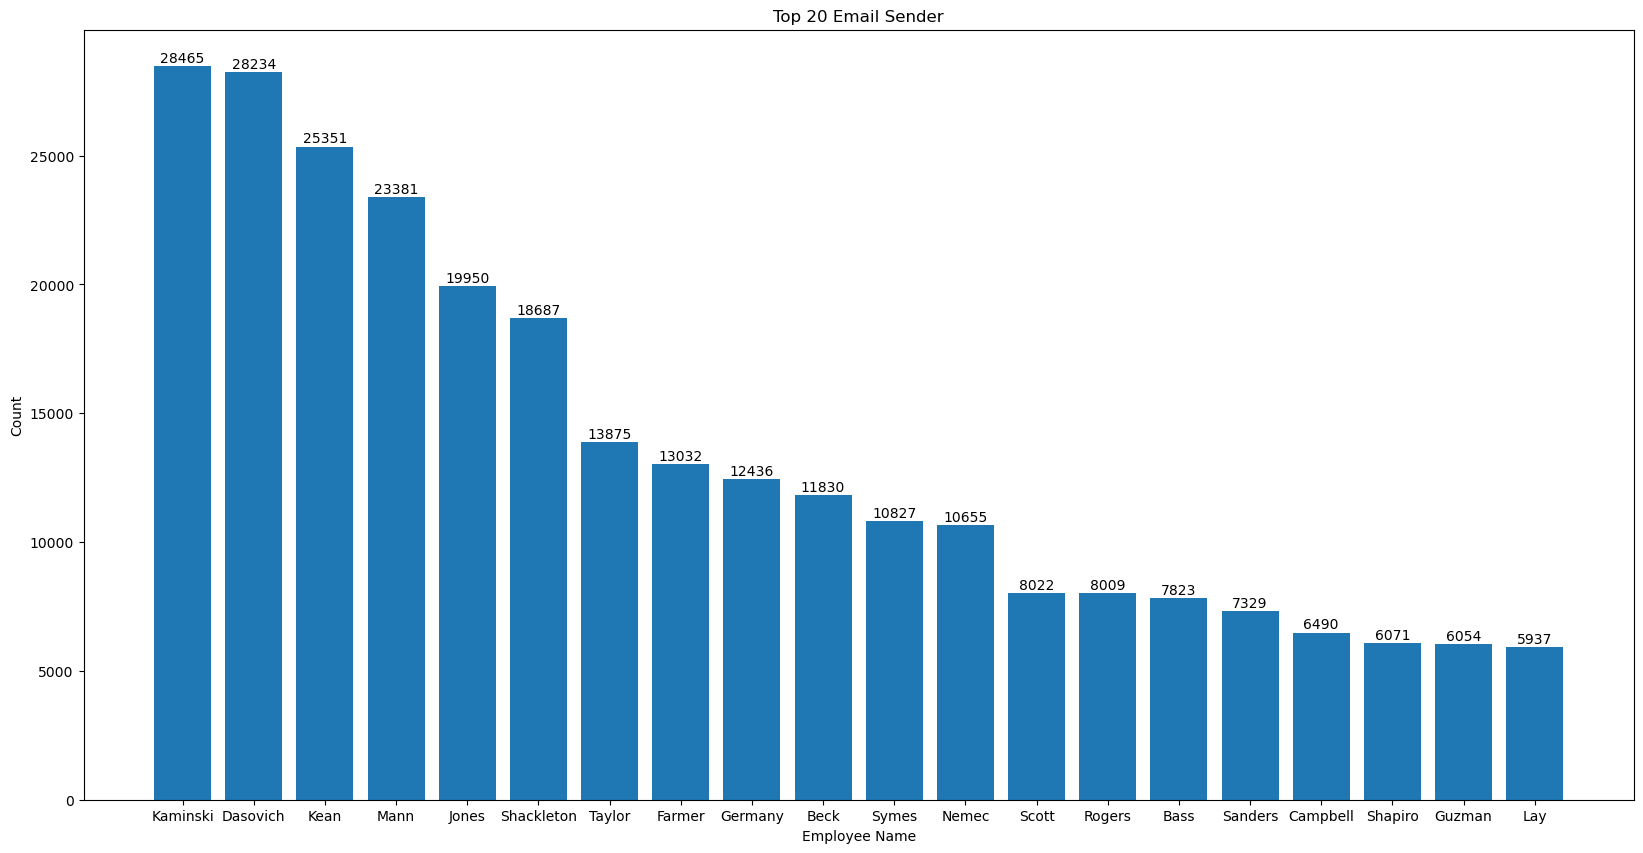

In [21]:
Highest_email_sender = pd.DataFrame(df['Name'].value_counts())
Highest_email_sender = Highest_email_sender.reset_index()

#Give a column name
Highest_email_sender.columns = ['Emp_name', 'count']


# Get the top 20 Highest_email_sender
top_20_highest_email_sender = Highest_email_sender.iloc[:20]

# Plot the bar chart
plt.figure(figsize=(20, 10))
plt.bar(top_20_highest_email_sender['Emp_name'], top_20_highest_email_sender['count'])

# Add count labels on top of each bar
for i, count in enumerate(top_20_highest_email_sender['count']):
    plt.text(i, count+150, str(count), ha='center')

plt.xlabel('Employee Name')
plt.ylabel('Count')
plt.title('Top 20 Email Sender')
#plt.xticks(rotation=90)
plt.show()

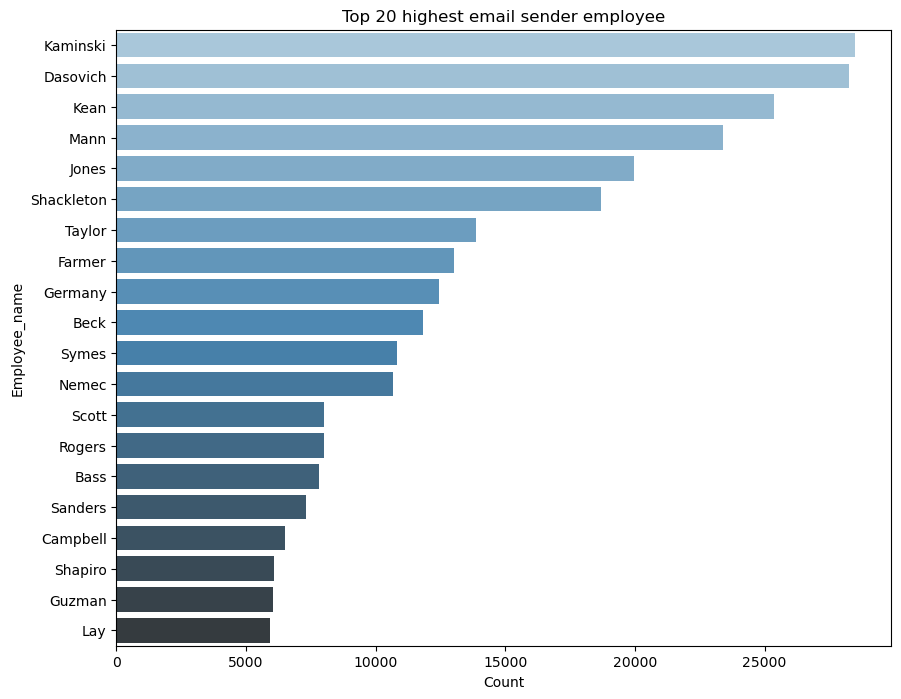

In [22]:
plt.figure(figsize=(10,8))

sns.barplot(y="Emp_name", x="count", data=top_20_highest_email_sender, palette="Blues_d")
plt.title("Top 20 highest email sender employee")
plt.xlabel("Count")
plt.ylabel("Employee_name")
plt.show()

In [23]:
def convert_date(date_string):
    date = datetime.strptime(date_string.strip(), "%d %b %Y %H:%M:%S")
    return date.strftime("%d-%m-%Y %H:%M:%S")

date_time = df['Date'].apply(lambda x: x.split(',')[1].split('-')[0])
time_zone=df['Date'].apply(lambda x: x.split('(')[1].split(')')[0])

converted_dates = date_time.apply(convert_date)

#Write an if-else statement, when time_zone is 'PDT' and 'PST' then convert into 'IST' of the column date_time else same, an


print(converted_dates)
print(time_zone)

0         14-05-2001 16:39:00
1         04-05-2001 13:51:00
2         18-10-2000 03:00:00
3         23-10-2000 06:13:00
4         31-08-2000 05:07:00
                 ...         
517396    28-11-2001 13:30:11
517397    28-11-2001 12:47:48
517398    28-11-2001 07:20:00
517399    27-11-2001 11:52:45
517400    26-11-2001 10:48:43
Name: Date, Length: 517401, dtype: object
0         PDT
1         PDT
2         PDT
3         PDT
4         PDT
         ... 
517396    PST
517397    PST
517398    PST
517399    PST
517400    PST
Name: Date, Length: 517401, dtype: object


In [24]:
import pytz

def convert_date(row):
    date_string = row['Date'].split(',')[1].split('-')[0].strip()
    timezone = row['Date'].split('(')[1].split(')')[0].strip()
    date = datetime.strptime(date_string, "%d %b %Y %H:%M:%S")
    ist_timezone = pytz.timezone('Asia/Kolkata')
    if timezone in ['PDT', 'PST']:
        date = pytz.timezone('US/Pacific').localize(date).astimezone(ist_timezone)
    return date.strftime("%d-%m-%Y %H:%M:%S")

df['Converted_Date'] = df.apply(convert_date, axis=1)

print(df['Converted_Date'])


0         15-05-2001 05:09:00
1         05-05-2001 02:21:00
2         18-10-2000 15:30:00
3         23-10-2000 18:43:00
4         31-08-2000 17:37:00
                 ...         
517396    29-11-2001 03:00:11
517397    29-11-2001 02:17:48
517398    28-11-2001 20:50:00
517399    28-11-2001 01:22:45
517400    27-11-2001 00:18:43
Name: Converted_Date, Length: 517401, dtype: object


In [25]:
print(df['X-Folder'][0])

# we only want last folder name
df['X-Folder'][0].split("\\")[-1]

\Phillip_Allen_Jan2002_1\Allen, Phillip K.\'Sent Mail


"'Sent Mail"

In [26]:
def preprocess_folder(folders):
    column = []
    for folder in folders:
        if (folder is None or folder == ""):
            column.append(np.nan)
        else:
            column.append(folder.split("\\")[-1].lower())
    return column

df['X-Folder'] = preprocess_folder(df['X-Folder'])
df.head(2)

#"""Anonther way to write an code, using list comprehension."""
# def preprocess_folder(folders):
#     column = [folder.split("\\")[-1].lower() if folder else np.nan for folder in folders]
#     return column

# df['X-Folder'] = preprocess_folder(df['X-Folder'])
# df.head(2)

,file,message,Message-ID,Date,Sender,Receiver,Subject,X-Folder,Content,Name,Converted_Date
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,,'sent mail,Here is our forecast\n\n,Allen,15-05-2001 05:09:00
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,'sent mail,Traveling to have a business meeting takes the...,Allen,05-05-2001 02:21:00


In [27]:
print('Unique folders:',len(df['X-Folder'].unique()))

df['X-Folder'].unique()[:20]

Unique folders: 1782


array(["'sent mail", 'all documents', 'contacts', 'deleted items',
       'discussion threads', 'inbox', 'notes inbox', 'sent items', 'sent',
       'straw', '2000 conference', 'active international', 'avaya', 'bmc',
       'bridge', 'bristol babcock', 'colleen koenig', 'compaq',
       'computer associates', 'continental airlines'], dtype=object)

In [28]:
#Replace empty missing values in subject with np.nan

def replace_empty_with_nan(subject):
    column = []
    for val in subject:
        if (val == ""):
            column.append(np.nan) 
        else:
            column.append(val)
    return column

# """Another another to write an code"""
# def replace_empty_with_nan(subject):
#     return [np.nan if val == "" else val for val in subject]

In [29]:
df['Subject'] = replace_empty_with_nan(df['Subject'])
#df['X-To'] = replace_empty_with_nan(df['X-To'])

In [30]:
df.isnull().sum()

file                  0
message               0
Message-ID            0
Date                  0
Sender                0
Receiver          21847
Subject           19187
X-Folder             29
Content               0
Name                  0
Converted_Date        0
dtype: int64

In [31]:
# Calculate percentage of missing values
miss = df.isnull().sum()
miss = miss[miss > 0]
miss = (miss / df.shape[0]) * 100
miss = miss.round(2)  # Round off to 2 decimal places
print('Percentage of Missing values:')
print(miss.astype(str) + '%')

Percentage of Missing values:
Receiver    4.22%
Subject     3.71%
X-Folder    0.01%
dtype: object


In [32]:
df.head()

,file,message,Message-ID,Date,Sender,Receiver,Subject,X-Folder,Content,Name,Converted_Date
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...,<18782981.1075855378110.JavaMail.evans@thyme>,"Mon, 14 May 2001 16:39:00 -0700 (PDT)",phillip.allen@enron.com,tim.belden@enron.com,NaN,'sent mail,Here is our forecast\n\n,Allen,15-05-2001 05:09:00
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...,<15464986.1075855378456.JavaMail.evans@thyme>,"Fri, 4 May 2001 13:51:00 -0700 (PDT)",phillip.allen@enron.com,john.lavorato@enron.com,Re:,'sent mail,Traveling to have a business meeting takes the...,Allen,05-05-2001 02:21:00
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...,<24216240.1075855687451.JavaMail.evans@thyme>,"Wed, 18 Oct 2000 03:00:00 -0700 (PDT)",phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,'sent mail,test successful. way to go!!!,Allen,18-10-2000 15:30:00
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...,<13505866.1075863688222.JavaMail.evans@thyme>,"Mon, 23 Oct 2000 06:13:00 -0700 (PDT)",phillip.allen@enron.com,randall.gay@enron.com,NaN,'sent mail,"Randy,\n\n Can you send me a schedule of the s...",Allen,23-10-2000 18:43:00
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...,<30922949.1075863688243.JavaMail.evans@thyme>,"Thu, 31 Aug 2000 05:07:00 -0700 (PDT)",phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,'sent mail,Let's shoot for Tuesday at 11:45.,Allen,31-08-2000 17:37:00


In [33]:
drop_column=['file','message','Date']
df.drop(drop_column, axis=1, inplace=True)

In [34]:
df.rename(columns={'Converted_Date': 'Date'}, inplace=True)
df

,Message-ID,Sender,Receiver,Subject,X-Folder,Content,Name,Date
0,<18782981.1075855378110.JavaMail.evans@thyme>,phillip.allen@enron.com,tim.belden@enron.com,NaN,'sent mail,Here is our forecast\n\n,Allen,15-05-2001 05:09:00
1,<15464986.1075855378456.JavaMail.evans@thyme>,phillip.allen@enron.com,john.lavorato@enron.com,Re:,'sent mail,Traveling to have a business meeting takes the...,Allen,05-05-2001 02:21:00
2,<24216240.1075855687451.JavaMail.evans@thyme>,phillip.allen@enron.com,leah.arsdall@enron.com,Re: test,'sent mail,test successful. way to go!!!,Allen,18-10-2000 15:30:00
3,<13505866.1075863688222.JavaMail.evans@thyme>,phillip.allen@enron.com,randall.gay@enron.com,NaN,'sent mail,"Randy,\n\n Can you send me a schedule of the s...",Allen,23-10-2000 18:43:00
4,<30922949.1075863688243.JavaMail.evans@thyme>,phillip.allen@enron.com,greg.piper@enron.com,Re: Hello,'sent mail,Let's shoot for Tuesday at 11:45.,Allen,31-08-2000 17:37:00
...,...,...,...,...,...,...,...,...
517396,<26807948.1075842029936.JavaMail.evans@thyme>,john.zufferli@enron.com,kori.loibl@enron.com,Trade with John Lavorato,sent items,This is a trade with OIL-SPEC-HEDGE-NG (John L...,Zufferli,29-11-2001 03:00:11
517397,<25835861.1075842029959.JavaMail.evans@thyme>,john.zufferli@enron.com,john.lavorato@enron.com,Gas Hedges,sent items,Some of my position is with the Alberta Term b...,Zufferli,29-11-2001 02:17:48
517398,<28979867.1075842029988.JavaMail.evans@thyme>,john.zufferli@enron.com,dawn.doucet@enron.com,RE: CONFIDENTIAL,sent items,2\n\n -----Original Message-----\nFrom: \tDouc...,Zufferli,28-11-2001 20:50:00
517399,<22052556.1075842030013.JavaMail.evans@thyme>,john.zufferli@enron.com,jeanie.slone@enron.com,Calgary Analyst/Associate,sent items,Analyst\t\t\t\t\tRank\n\nStephane Brodeur\t\t\...,Zufferli,28-11-2001 01:22:45


In [35]:
# # Define the list of required columns
# required_columns = ['Converted_Date','Name', 'Sender', 'Receiver', 'X-Folder', 'Subject', 'Content']

# # # Select only the required columns from the DataFrame
# # new_df = df[required_columns]

# # Alternatively, you can use the loc operator
# new_df = df.loc[:, required_columns]
# new_df


In [36]:
# save the data
# df.to_csv("cleaned_data.csv", index=False)